In [7]:
from sklearn.datasets import make_swiss_roll
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0)

In [2]:
print(X.shape) # (1000, 3)
print(t.shape) # (1000,)

(1000, 3)
(1000,)


In [3]:
print(t[:10])

[10.08011667 10.02640256 11.3336207   7.68359547  6.49068609  8.10159871
  7.3124782   8.59278542 11.94016968  9.90971016]


In [4]:
color = (t - t.min()) / (t.max() - t.min())

In [8]:
data = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text = ['point #{}'.format(i) for i in range(X.shape[0])],
    mode='markers',
    marker=dict(
        size=3,
        color=color,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)

In [9]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor='#7f7f7f',
    #plot_bgcolor='#c7c7c7'
)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [16]:
fig = go.Figure(data=[data], layout=layout)
# fig = go.Figure(data=[data1, data2, data3], layout=layout)

In [12]:
# iplot(fig)

In [15]:
from plotly.offline import plot
plot(fig, filename='plotly-3d-scatter-small.html', auto_open=False)

'plotly-3d-scatter-small.html'

In [17]:
%matplotlib inline
import numpy as np
# import openslide
import cv2
import matplotlib.pyplot as plt
import sys
import os
from numpy import linalg as LA
sys.path.append('../')

In [18]:
data_path = '../patches/train_data/Stomach/M/anno_stomach_M_0001/'
img_list = os.listdir(data_path)

(256, 256, 3)


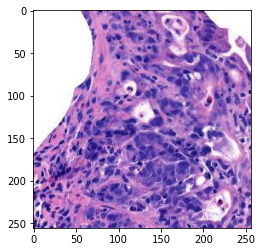

In [26]:
img = cv2.imread(data_path + img_list[8])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(256, 256))
print(img.shape)
plt.imshow(img)

In [31]:
from augment import convert_RGB_to_OD, convert_OD_to_RGB, rgb_to_sda, sda_to_rgb
sda_img = rgb_to_sda(img)

In [33]:
img_flat = img.reshape(-1,3)/255.
img_flat = sda_img.reshape(-1,3)/255.

In [34]:
data = go.Scatter3d(
    x=img_flat[:,0],
    y=img_flat[:,1],
    z=img_flat[:,2],
    text = ['point #{}'.format(i) for i in range(img_flat.shape[0])],
    mode='markers',
    marker=dict(
        size=2,
        color=color,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)

In [35]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor='#7f7f7f',
    #plot_bgcolor='#c7c7c7'
)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [36]:
from plotly.offline import plot
fig = go.Figure(data=[data], layout=layout)
plot(fig, filename='image_3d_plot.html', auto_open=False)

'image_3d_plot.html'